## Аналитика в интернет-магазине. A/B тесты.  
### Принятие решений в бизнесе на основе данных

### Описание проекта  

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

### Описание данных  

#### Файл hypothesis.csv:  

- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.  

#### Файл orders.csv:  

- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.  

#### Файл visitors.csv:  

- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

<a id='back'><a/> 
# Задачи исследования
    
### [1. Приоритизация гипотез.](#1)
#### [1.1 Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.](#1.1)  
#### [1.2 Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.](#1.2)  
#### [1.3 Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.](#1.3)

### [2. Анализ A/B-теста.](#2)
#### [2.1 Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.](#2.1)  
#### [2.2 Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.](#2.2)
#### [2.3 Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.](#2.3)
#### [2.4 Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.](#2.4)   
#### [2.5 Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.](#2.5)  
#### [2.6 Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.](#2.6) 
#### [2.7 Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.](#2.7) 
#### [2.8 Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.](#2.8) 
#### [2.9 Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.](#2.9)
#### [2.10 Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.](#2.10)
#### [2.11 Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.](#2.11)
#### [2.12 Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.](#2.12) 
#### [2.13 Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.](#2.13) 
#### [2.14 Примите решение по результатам теста и объясните его.](#2.14) 

Приступим к исследованию данных.

<a id='1'><a/> 
## 1. Приоритизация гипотез.
[Назад к оглавлению](#back)

In [1]:
#импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt

import seaborn as sns
sns.set(rc={'figure.figsize':(10, 8)})

import scipy.stats as stats
from scipy import stats as st

In [2]:
#для удобства отобразим все колонки таблицы и приведем данные к формату двух знаков после запятой
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 1)
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
#прочитаем таблицы
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

#### Посмотрим таблицы и информацию по ним

In [5]:
hypothesis.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


In [6]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [7]:
#проверим на дубликаты
hypothesis.duplicated().sum()

0

In [8]:
#приведем названия стобцов к нижнем регистру
hypothesis.columns = ['hypothesis', 'reach', 'impact', 'confidence', 'efforts']

С таблицей hypothesis все в порядке.

In [9]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [11]:
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']

In [12]:
#проверим на дубликаты
orders.duplicated().sum()

0

В таблице orders неверный тип данных в столбце с датами, приведем его к нужному типу.

In [13]:
orders['date'] = pd.to_datetime(orders['date'])

In [14]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [15]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [16]:
#проверим на дубликаты
visitors.duplicated().sum()

0

В таблице visitors неверный тип данных в столбце с датами, приведем его к нужному типу.

In [17]:
visitors['date'] = pd.to_datetime(visitors['date'])

In [18]:
#проверим, есть ли значения, которые встречаются в обеих группах
len(np.intersect1d(orders.query('group == "A"')['visitor_id'].unique(), orders.query('group == "B"')['visitor_id'].unique()))

58

В данных есть 58 значений, встречающихся в обеих группах. 58 значений от 1031 пользователей — допустимо, но мы удалим их, чтобы не было дополнительных искажений при проведении тестирования.

In [19]:
#посмотрим на id тех, кто попал в обе группы
list_id = np.intersect1d(orders.query('group == "A"')['visitor_id'].unique(), orders.query('group == "B"')['visitor_id'].unique())
list_id

array([   8300375,  199603092,  232979603,  237748145,  276558944,
        351125977,  393266494,  457167155,  471551937,  477780734,
        818047933,  963407295, 1230306981, 1294878855, 1316129916,
       1333886533, 1404934699, 1602967004, 1614305549, 1648269707,
       1668030113, 1738359350, 1801183820, 1959144690, 2038680547,
       2044997962, 2378935119, 2458001652, 2579882178, 2587333274,
       2600415354, 2654030115, 2686716486, 2712142231, 2716752286,
       2780786433, 2927087541, 2949041841, 2954449915, 3062433592,
       3202540741, 3234906277, 3656415546, 3717692402, 3766097110,
       3803269165, 3891541246, 3941795274, 3951559397, 3957174400,
       3963646447, 3972127743, 3984495233, 4069496402, 4120364173,
       4186807279, 4256040402, 4266935830], dtype=int64)

In [20]:
#переведем массив в список
list_id = list_id.tolist()

In [21]:
orders = orders[~orders.visitor_id.isin(list_id)]

In [22]:
#снова проверим, есть ли значения, которые встречаются в обеих группах
len(np.intersect1d(orders.query('group == "A"')['visitor_id'].unique(), orders.query('group == "B"')['visitor_id'].unique()))

0

### Вывод  

В двух таблицах были неверные типы данных в столбцах со временем. Мы привели их к нужному типу. Дубликаты и пропуски не обнаружены. Отчистили данные от значений, повторяющихся в обеих группах. Данные готовы к дальнейшему исследованию

<a id='1.1'><a/> 
#### 1.1 Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
[Назад к оглавлению](#back)

$$ICE = \frac{Impact * Confidence}{Efforts}$$

In [23]:
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

In [24]:
hypothesis.sort_values('ICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


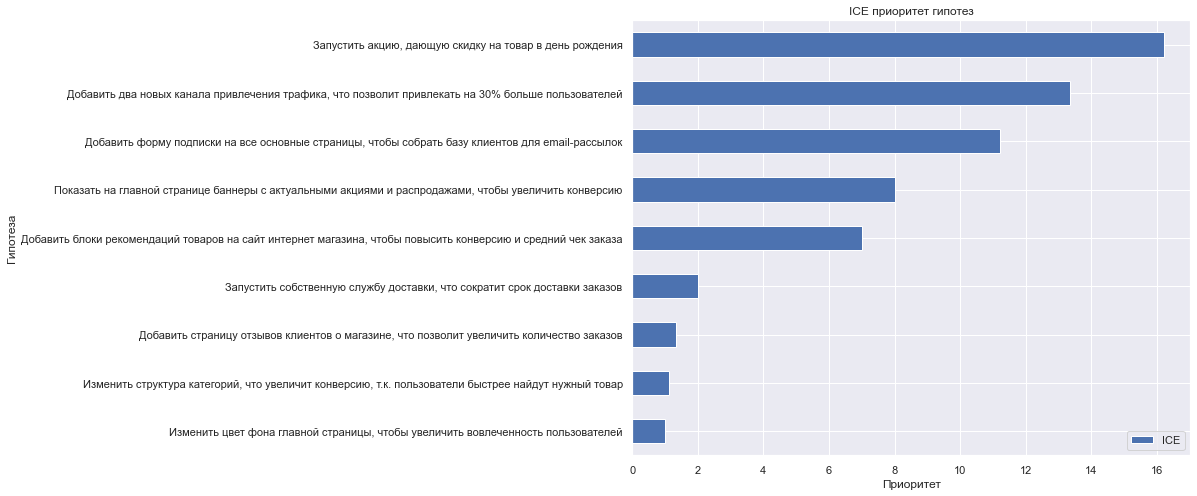

In [25]:
ax = hypothesis[['hypothesis', 'ICE']].set_index('hypothesis').sort_values('ICE', ascending=True).plot(kind='barh')
ax.set_xlabel('Приоритет')
ax.set_ylabel('Гипотеза')
ax.set_title('ICE приоритет гипотез')
plt.show()

Как мы видим, наиболее приоритетной является гипотеза номер 9 - <b>Запустить акцию, дающую скидку на товар в день рождения</b>. На втором месте стоит гипотеза 1, за ней следует гипотеза 8.

<a id='1.2'><a/> 
#### 1.2 Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
[Назад к оглавлению](#back)

$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$

In [26]:
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

In [27]:
hypothesis.sort_values('RICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.00


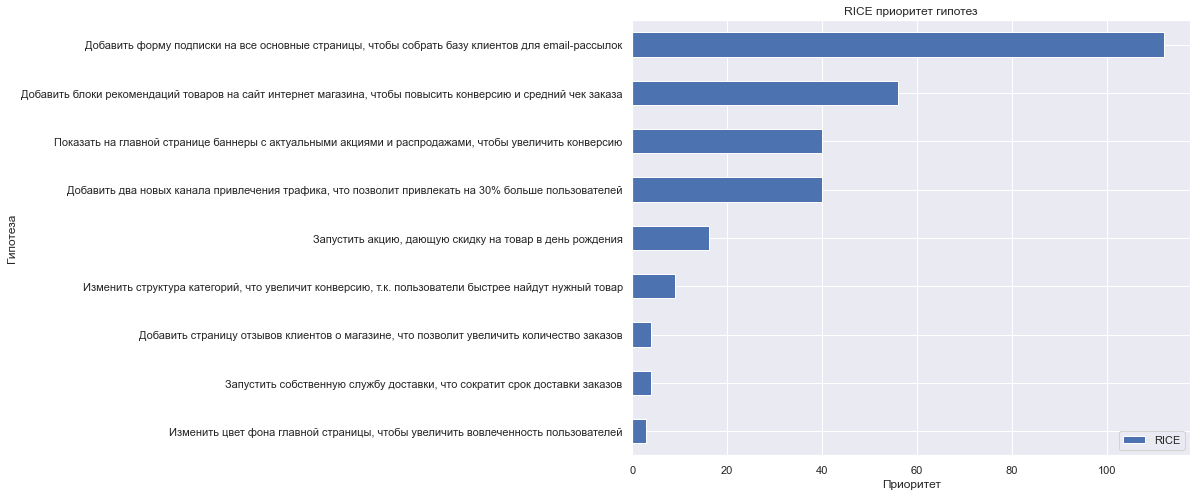

In [28]:
ax = hypothesis[['hypothesis', 'RICE']].set_index('hypothesis').sort_values('RICE', ascending=True).plot(kind='barh')
ax.set_xlabel('Приоритет')
ax.set_ylabel('Гипотеза')
ax.set_title('RICE приоритет гипотез')
plt.show()

Тут мы видим совершенно другую картину. Гипотеза 9, которая была в топе в ICE находится аж на 5 месте.

<a id='1.3'><a/> 
#### 1.3 Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.
[Назад к оглавлению](#back)

In [29]:
ICE_RICE = pd.DataFrame({'ICE': [8, 0, 7, 6, 2, 1, 5, 3, 4], 'RICE': [7, 2, 0, 6, 8, 3, 1, 5, 4]})
ICE_RICE

,ICE,RICE
0,8,7
1,0,2
2,7,0
3,6,6
4,2,8
5,1,3
6,5,1
7,3,5
8,4,4


### Вывод  

Результаты преоритизации ICE и RICE сильно отличаются друг от друга. Так происходит потому, что что формулы разные - одна учитывает охват, а другая нет.

<a id='2'><a/> 
## 2. Анализ A/B-теста.
[Назад к оглавлению](#back)

In [30]:
#посмотрим рандомные выборки из таблиц
orders.sample(5)

,transaction_id,visitor_id,date,revenue,group
954,3831307789,3185203440,2019-08-28,1290,B
1118,418108717,1985475298,2019-08-13,750,B
167,1556785718,2583793022,2019-08-23,1038,A
99,2951489300,926057494,2019-08-01,300,A
58,2145193898,1221478247,2019-08-16,1440,B


In [31]:
visitors.sample(5)

,date,group,visitors
21,2019-08-22,A,609
29,2019-08-30,A,490
1,2019-08-02,A,619
49,2019-08-19,B,487
52,2019-08-22,B,650


Соберем все коммулятивные данные. Объединим таблицы и добавим в новую таблицу: дату, группу A/B-теста, число уникальных заказов в группе теста по указанную дату включительно, число уникальных пользователей, совершивших хотя бы 1 заказ в группе теста по указанную дату включительно, суммарную выручку заказов в группе теста по указанную дату включительно.

In [32]:
orders_grouped = (orders.groupby(['date','group'], as_index=False)
                        .agg({'transaction_id':'nunique','visitor_id':'nunique','revenue':'sum'}))\
                        .rename(columns={'transaction_id':'orders','visitor_id':'buyers'})
orders_grouped['group_copy'] = orders_grouped['group']
orders_grouped = orders_grouped.set_index(['date','group'])
orders_cumsum = orders_grouped.sort_values(['date','group']).groupby('group_copy').cumsum().reset_index()

In [33]:
#посчитаем сумму визитов по дням в каждой группе
visitors_cumsum = visitors.groupby(['date','group'], as_index=False).agg({'visitors':'sum'}).sort_values(['date','group'])

In [34]:
#скопируем group чтобы провести по ней кумулятивную сумму
visitors_cumsum['group_copy'] = visitors_cumsum['group']
visitors_cumsum = visitors_cumsum.set_index(['date','group']).groupby('group_copy').cumsum().reset_index()

In [35]:
cummulative = orders_cumsum.join(visitors_cumsum[['visitors']])

In [36]:
#добавим столбцы со средним чеком и конверсией
cummulative['average_check'] = cummulative['revenue'] / cummulative['orders']
cummulative['conversion'] = cummulative['orders'] / cummulative['visitors']

In [37]:
cummulative

,date,group,orders,buyers,revenue,visitors,average_check,conversion
0,2019-08-01,A,23,19,142779,719,"6,207.78",0.03
1,2019-08-01,B,17,17,59758,713,"3,515.18",0.02
2,2019-08-02,A,42,37,234381,1338,"5,580.50",0.03
3,2019-08-02,B,40,39,221801,1294,"5,545.02",0.03
4,2019-08-03,A,66,61,346854,1845,"5,255.36",0.04
...,...,...,...,...,...,...,...,...
57,2019-08-29,B,510,506,4746610,17708,"9,307.08",0.03
58,2019-08-30,A,460,449,3311413,18037,"7,198.72",0.03
59,2019-08-30,B,531,527,4955833,18198,"9,333.02",0.03
60,2019-08-31,A,468,457,3364656,18736,"7,189.44",0.02


<a id='2.1'><a/> 
#### 2.1 Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
[Назад к оглавлению](#back)

In [38]:
#создадим переменные
cummulativeA = cummulative[cummulative['group']=='A'][['date', 'revenue']]
cummulativeB = cummulative[cummulative['group']=='B'][['date', 'revenue']]

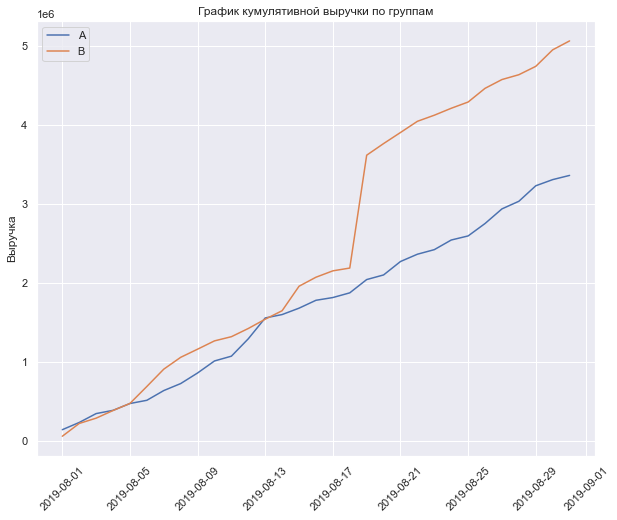

In [39]:
#построим график
plt.plot(cummulativeA.iloc[:,0].to_frame(), cummulativeA.iloc[:,1].to_frame(), label='A' )
plt.plot(cummulativeB.iloc[:,0].to_frame(), cummulativeB.iloc[:,1].to_frame(), label='B')
plt.title('График кумулятивной выручки по группам')
plt.ylabel("Выручка")
plt.xticks(rotation=45)
plt.legend()
plt.show()

Группа А растет линейно, а у группы Б резкий скачек 17-18 числа, что может говорить о выбросе в данных.

<a id='2.2'><a/> 
#### 2.2 Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
[Назад к оглавлению](#back)

In [40]:
#создадим переменные
cummulativeA = cummulative[cummulative['group']=='A'][['date', 'average_check']]
cummulativeB = cummulative[cummulative['group']=='B'][['date', 'average_check']]

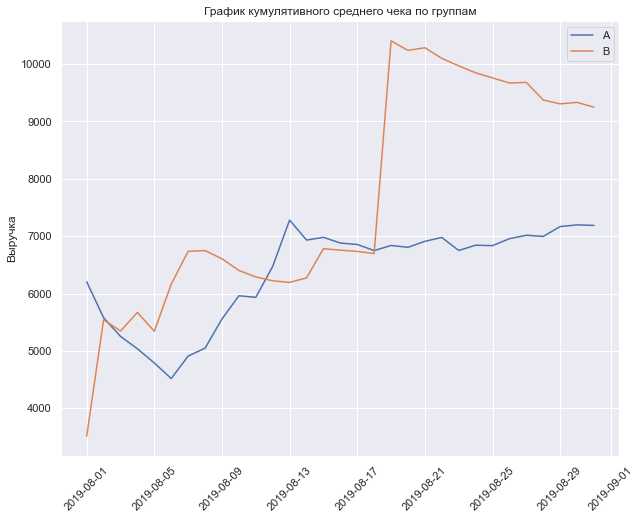

In [41]:
#построим график
plt.plot(cummulativeA.iloc[:,0].to_frame(), cummulativeA.iloc[:,1].to_frame(), label='A' )
plt.plot(cummulativeB.iloc[:,0].to_frame(), cummulativeB.iloc[:,1].to_frame(), label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.ylabel("Выручка")
plt.xticks(rotation=45)
plt.legend()
plt.show()

Кумулятивное значение среднего чека по сегментам колеблется. Особенно заметен резкий скачок у группы Б. Принимать решения по данной метрике рано и требуется анализ выбросов, которые сильно влияют на данные.

<a id='2.3'><a/> 
#### 2.3 Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
[Назад к оглавлению](#back)

In [42]:
cumulative_revenue = (cummulativeA[['date', 'average_check']].merge(cummulativeB[['date', 'average_check']], 
                                            left_on='date', right_on='date', how='left', suffixes=['_A', '_B']))

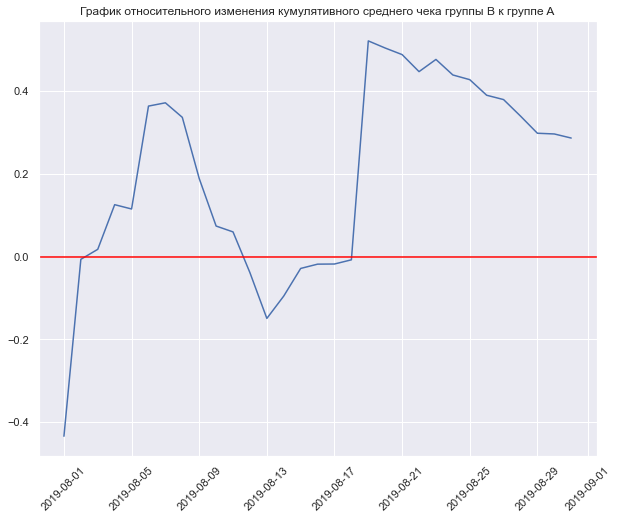

In [43]:
#построим график
plt.plot(cumulative_revenue['date'], cumulative_revenue['average_check_B'] / cumulative_revenue['average_check_A']-1)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.axhline(y=0, color='red', linestyle='-')
plt.xticks(rotation=45)
plt.show()

Результаты теста значительно меняются в разные даты. Похоже, что именно в эти даты совершены аномальные заказы.

<a id='2.4'><a/> 
#### 2.4 Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
[Назад к оглавлению](#back)

In [44]:
#создадим переменные
cummulativeA = cummulative[cummulative['group']=='A'][['date', 'conversion']]
cummulativeB = cummulative[cummulative['group']=='B'][['date', 'conversion']]

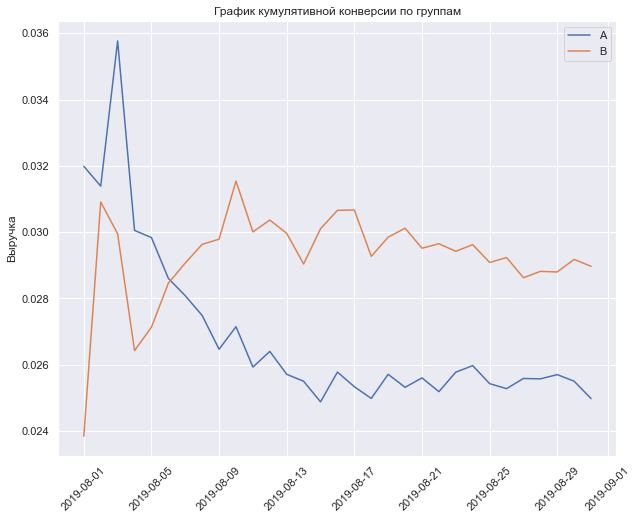

In [45]:
#построим график
plt.plot(cummulativeA.iloc[:,0].to_frame(), cummulativeA.iloc[:,1].to_frame(), label='A' )
plt.plot(cummulativeB.iloc[:,0].to_frame(), cummulativeB.iloc[:,1].to_frame(), label='B')
plt.title('График кумулятивной конверсии по группам')
plt.ylabel("Выручка")
plt.xticks(rotation=45)
plt.legend()
plt.show()

У обеих групп наблюдается пик 2-3 числа, после чего у обеих групп идет резкое снижение. У группы А снижение более серьезное, в то время как у группы Б показатели выглядят лучше. Однако, смотреть на предварительные результаты в первую неделю теста не стоит, так как группы эксперимента малы, и каждый новый пользователь сильно меняет картину, в последующие недели когда метрики начинают стабилизироваться, можно оценивать тренды, динамику и прочее. 

<a id='2.5'><a/> 
#### 2.5 Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
[Назад к оглавлению](#back)

In [46]:
cumulative_conv = (cummulativeA[['date', 'conversion']].merge(cummulativeB[['date', 'conversion']], 
                                            left_on='date', right_on='date', how='left', suffixes=['_A', '_B']))

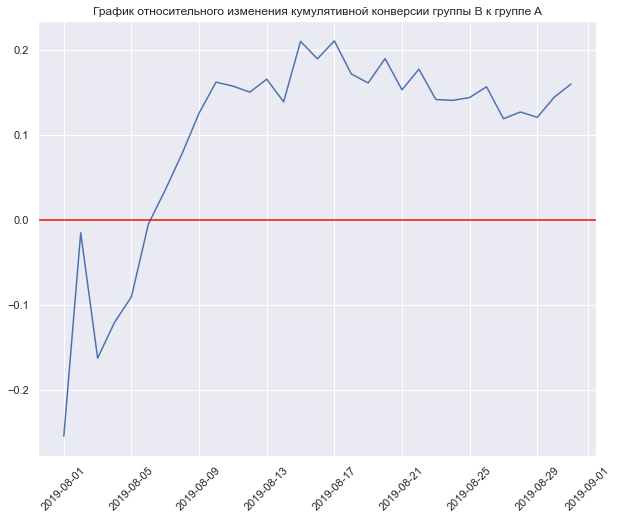

In [47]:
#построим график
plt.plot(cumulative_conv['date'], cumulative_conv['conversion_B'] / cumulative_conv['conversion_A']-1)
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.axhline(y=0, color='red', linestyle='-')
plt.xticks(rotation=45)
plt.show()

Конверсия группы Б показывает себя намного лучше, достигая прироста до 20% относительно группы А.

<a id='2.6'><a/> 
#### 2.6 Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
[Назад к оглавлению](#back)

In [48]:
#создадим таблицу по заказам
orders_per_user = orders.groupby('visitor_id', as_index=False).agg({'transaction_id':'nunique'})\
                         .rename(columns={'transaction_id':'orders'})
orders_per_user.sample(5)

,visitor_id,orders
783,3353177029,1
895,3928949490,1
265,1154728414,1
546,2396134342,1
652,2845785181,1


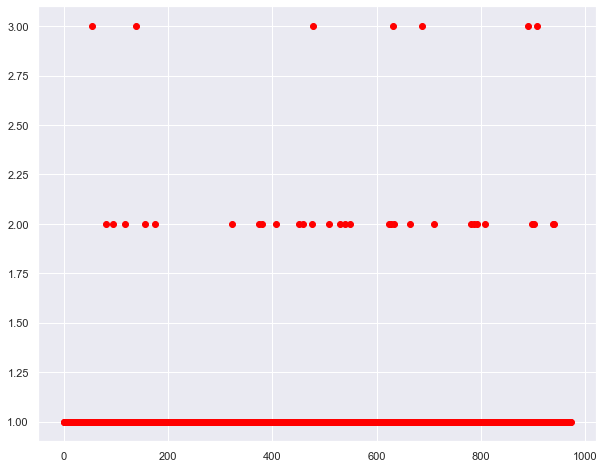

In [49]:
#построим график
x_values = pd.Series(range(0,len(orders_per_user['orders'])))
plt.scatter(x_values, orders_per_user['orders'], color='red')
plt.show()

Как мы видим по графику, большая часть людей совершает покупку один раз, но есть те, кто совершают множество (более 10) покупок.

<a id='2.7'><a/> 
#### 2.7 Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
[Назад к оглавлению](#back)

In [50]:
print('90 перцентиль: %.2f' % (np.percentile(orders_per_user['orders'], [90])))
print('95 перцентиль: %.2f' % (np.percentile(orders_per_user['orders'], [95])))
print('99 перцентиль: %.2f' % (np.percentile(orders_per_user['orders'], [99])))

90 перцентиль: 1.00
95 перцентиль: 1.00
99 перцентиль: 2.00


In [51]:
#посмотрим максимальное значение числа покупок
orders_per_user['orders'].max()

3

In [52]:
#посмотрим, сколько покупателей, выходящих за 99 процентиль, т.е. являющимися выбросами
len(orders_per_user[orders_per_user['orders'] >= 4]['visitor_id'])

0

In [53]:
#добавим аномальные значения в список, они понадобятся нам дальше для дальнейшего исследования
outlaws = orders_per_user[orders_per_user['orders'] >= 4]['visitor_id'].to_list()

Все значения за пределами 99 процентиля являются аномальными.

<a id='2.8'><a/> 
#### 2.8 Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
[Назад к оглавлению](#back)

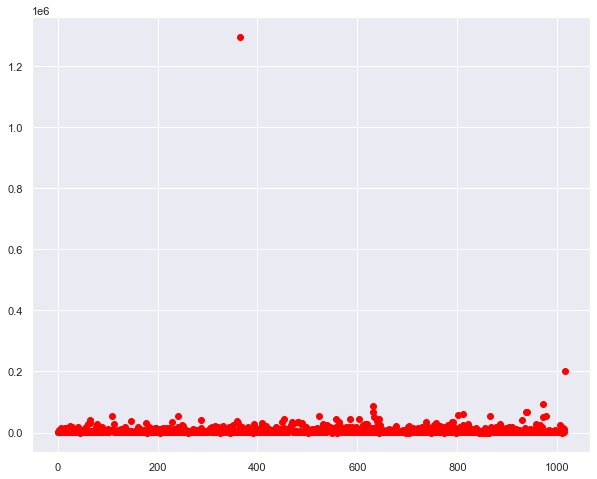

In [54]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'], color='red')
plt.show()

На графике отчетливо видно 2 выброса. Это могут быть единичные заказы, совершенные какими-то предприятиями, которые закупали товр в очень болих объемах.

<a id='2.9'><a/> 
#### 2.9 Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
[Назад к оглавлению](#back)

In [55]:
print('90 перцентиль: %.2f' % (np.percentile(orders['revenue'], [90])))
print('95 перцентиль: %.2f' % (np.percentile(orders['revenue'], [95])))
print('99 перцентиль: %.2f' % (np.percentile(orders['revenue'], [99])))

90 перцентиль: 17990.00
95 перцентиль: 26785.00
99 перцентиль: 53904.00


In [56]:
#посмотрим максимальную сумму выручки заказа
orders['revenue'].max()

1294500

In [57]:
#посмотрим на медианное значение
orders['revenue'].median()

2955.0

In [58]:
#посмотрим на этот заказ
orders[orders['revenue'] == 1294500]

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B


In [59]:
#посмотрим на историю заказов этого покупателя
orders[orders['visitor_id'] == 1920142716]

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B


Похоже, что это была единоразовая, но очень крупная покупка на сумму 1294500 денежных единиц, в то время как медианное значение составляет 2955 единиц.  

Все что за пределами 99 процентиля - я вляется аномальными значениями.

<a id='2.10'><a/> 
#### 2.10 Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
[Назад к оглавлению](#back)

In [60]:
conversion = (orders.groupby('group').agg({'transaction_id':'count'}).rename(columns={'transaction_id':'orders'}))\
                                     .join((visitors.groupby('group').agg({'visitors':'sum'}))).reset_index()

In [61]:
#добавим столбец с конверсией
conversion['conversion'] = conversion['orders'] / conversion['visitors']

In [62]:
conversion

,group,orders,visitors,conversion
0,A,468,18736,0.02
1,B,548,18916,0.03


Воспользуемся Z-критерием для разности двух долей. Сформулируем гипотезы. 

<b>H0</b>: Конверсия в группе A равна конверсии в группе B  
<b>H1</b>: Конверсия в группе A не равна конверсии в группе B

In [63]:
alpha=0.05

purchases = np.array(conversion['orders'])
leads = np.array(conversion['visitors'])

p1 = purchases[0] / leads[0]
p2 = purchases[1] / leads[1]

combined = (purchases[0] + purchases[1]) / (leads[0] + leads[1])
difference = p1-p2

z_value = difference / math.sqrt(combined * (1 - combined) * (1 / leads[0] + 1 / leads[1]))
distr = st.norm(0,1)
p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.016851380434703023
Отвергаем нулевую гипотезу


Подтвердилась гипотеза, что конверсия в группе A не равна конверсии в группе B. Попробуем умножить значения на 1000 и посмотрим на результаты конверсии детальнее.

In [64]:
conversion['conversion_х_1000'] = conversion['conversion'] * 1000
conversion

,group,orders,visitors,conversion,conversion_х_1000
0,A,468,18736,0.02,24.98
1,B,548,18916,0.03,28.97


Как мы видим, конверсия группы Б действительно больше. Статистическая значимость присутствует.

<a id='2.11'><a/> 
#### 2.11 Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
[Назад к оглавлению](#back)

Воспользуемся критерием Манна-Уитни. Сформулируем гипотезы.  

<b>H0</b>: Средний чек A не превосходит средний чек группы B  
<b>H1</b>: Средний чек A превосходит средний чек группы B

In [65]:
alpha = 0.05

results = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])
pvalue = results.pvalue

print('p-значение: ', pvalue)

if (pvalue < alpha):
    print("Отвергаем H0: разница статистически значима")
else:
    print("Не получилось отвергнуть H0: вывод о различии сделать нельзя")

p-значение:  0.41474544990747664
Не получилось отвергнуть H0: вывод о различии сделать нельзя


In [66]:
#проверим средние значения чека в группах
print('Среднее значение чека в группе А:', orders[orders['group']=='A']['revenue'].mean())
print('Среднее значение чека в группе Б:', orders[orders['group']=='B']['revenue'].mean())

Среднее значение чека в группе А: 7189.4358974358975
Среднее значение чека в группе Б: 9249.94890510949


Средний чек группы Б оказался больше. Но в данном случае мы не можем говорить о статистически-значимой разнице.

<a id='2.12'><a/> 
#### 2.12 Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
[Назад к оглавлению](#back)

In [67]:
#отчистим данные
orders_temp = orders[~orders['visitor_id'].isin(outlaws)]
conversion_clear = (orders_temp.groupby('group').agg({'transaction_id':'count'}).rename(columns={'transaction_id':'orders'}))\
                                                .join((visitors.groupby('group').agg({'visitors':'sum'}))).reset_index()

Воспользуемся Z-критерием для разности двух долей. Сформулируем гипотезы.  

<b>H0</b>: Конверсия в группе A равна конверсии в группе B  
<b>H1</b>: Конверсия в группе A не равна конверсии в группе B

In [68]:
alpha=0.05

purchases = np.array(conversion_clear['orders'])
leads = np.array(conversion_clear['visitors'])

p1 = purchases[0] / leads[0]
p2 = purchases[1] / leads[1]

combined = (purchases[0] + purchases[1]) / (leads[0] + leads[1])
difference = p1-p2

z_value = difference / math.sqrt(combined * (1 - combined) * (1 / leads[0] + 1 / leads[1]))
distr = st.norm(0,1)
p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.016851380434703023
Отвергаем нулевую гипотезу


В отчищенных данных конверсия группы Б снова превышает конверсию группы А со стататистической значимостью.

<a id='2.13'><a/> 
#### 2.13 Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
[Назад к оглавлению](#back)

In [69]:
#отчистим данные от значений превышающих 99 поцентиль
orders_clear = orders.query('revenue <= 58233')

Воспользуемся критерием Манна-Уитни. Сформулируем гипотезы.  

<b>H0</b>: Средний чек A не превосходит средний чек группы B  
<b>H1</b>: Средний чек A превосходит средний чек группы B

In [70]:
alpha = 0.05

results = st.mannwhitneyu(orders_clear[orders_clear['group']=='A']['revenue'], orders_clear[orders_clear['group']=='B']['revenue'])
pvalue = results.pvalue

print('p-значение: ', pvalue)

if (pvalue < alpha):
    print("Отвергаем H0: разница статистически значима")
else:
    print("Не получилось отвергнуть H0: вывод о различии сделать нельзя")

p-значение:  0.4503442178280369
Не получилось отвергнуть H0: вывод о различии сделать нельзя


In [71]:
#проверим средние значения чека в группах
print('Среднее значение чека в группе А:',orders_clear[orders_clear['group']=='A']['revenue'].mean())
print('Среднее значение чека в группе Б:',orders_clear[orders_clear['group']=='B']['revenue'].mean())

Среднее значение чека в группе А: 6504.548596112311
Среднее значение чека в группе Б: 6298.827205882353


После отчистки данных средние значения чеков почти сравнялись. Теперь разница между ними составляет 206 единиц, в то время как до отчистки данных разница составляла 2060 единиц. 

<a id='2.14'><a/> 
#### 2.14 Примите решение по результатам теста и объясните его. 
[Назад к оглавлению](#back)

Отчего зависит выручка:  Выручка = Среднийчек ∗ Покупатели 
Покупатели = Конверсия ∗Пользователи  

На мой взгляд верным решением будет продолжить тест, пока графики не встанут на плато и мы соберем больше наблюдений. У группы Б есть все шансы на победу, так как она показывала себя хорошо на протяжении всего исследования. Мы уже достигли значимых результатов для одного из показателей. Учитывая текущую динамику, все так и останется. Также плюсом, на мой взгляд, для завершения теста является время, отведенное для проведения теста, к сожалению, бизнес не может ждать любое требуемое время, а тест длился 30 дней.

Другой вопрос, что надо разрабатывать новый тест для увеличения среднего чека.  